In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.dt = dt    # Time step
        self.reset()

    def reset(self):
        self.voltage = 0.0  # Initial membrane potential

    def update(self, I):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = 0.0  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        spike = neuron.update(I)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


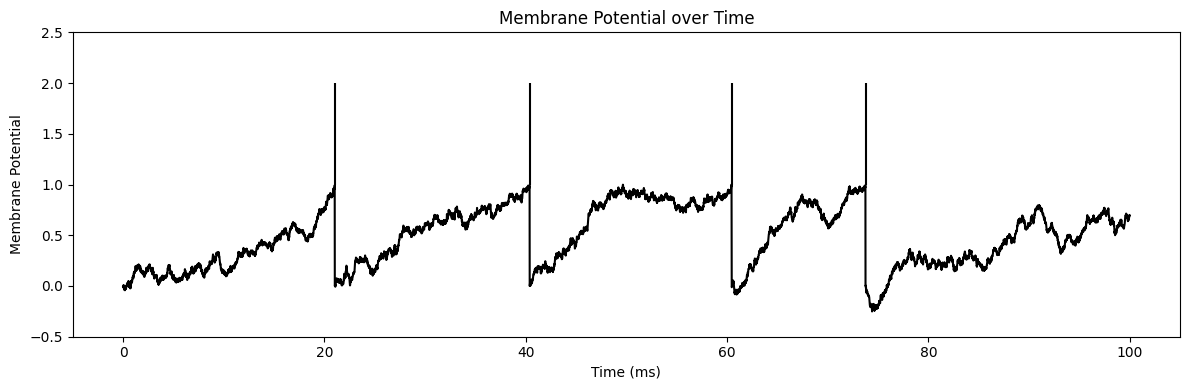

In [2]:
# Simulation parameters
tau = 10  # Membrane time constant (ms)
R = 1     # Membrane resistance
threshold = 1  # Firing threshold
sigma = 0.1  # Amplitude of the noise (in units of voltage)
dt = 0.01 # Time step (ms)
duration = 100  # Duration of simulation (ms)
I = 1  # Input current (arbitrary units)

spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, dt, duration)

plt.figure(figsize=(12, 4))
plt.vlines(spikes, ymin=1, ymax=2, colors='black', linestyles='-')
plt.plot(np.arange(0, duration, dt), voltages, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.ylim(-0.5, 2.5)
plt.title('Membrane Potential over Time')

plt.tight_layout()
plt.show()

# Subthreshold dynamics
- let's study the subthreshold dynamics by imposing a very high treshold that is never reached

[0.00836662178245031, 0.00043627321120988036, -0.009379686826657973, -0.01902638536162305, -0.01948258044324093, -0.012177885816446878, 0.022864660139655903, 0.014516906319091074, 0.014116244244852546, 0.013722182297503448, 0.005041470311588296, 0.0008521386187928023, -0.004954395630334709, -0.004112710636433238, -0.037441456319744576, -0.031079390956724202, -0.01868190423557242, -0.021801916667027663, -0.02228410731444561, -0.02523153986185294, -0.023123849152926076, -0.03457732551739558, -0.026275023367123354, -0.03913286853535311, -0.030444827707533942, -0.021769052696999105, -0.03030611691380785, -0.04048682298284634, -0.029106216568947893, -0.02954291178532216, -0.03217986860914891, -0.010159478537186236, -0.014532662203960784, -0.00984847687490943, -0.016104560311885778, -0.019614585986941366, -0.006304538919997861, 0.00411259493843605, -0.002720604364374311, 0.015384598999384314, 0.008058434121261763, 0.0050101990643300984, 0.0072721532561859335, 0.014210408207149456, 0.00572578

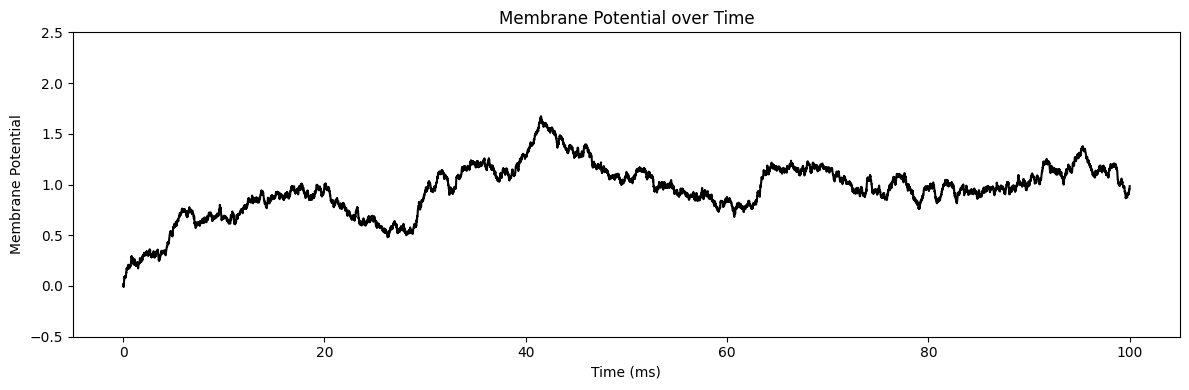

In [20]:
# Simulation parameters
tau = 10  # Membrane time constant (ms)
R = 1     # Membrane resistance
threshold = float('inf')  # Firing threshold
sigma = 0.1  # Amplitude of the noise (in units of voltage)
dt = 0.01 # Time step (ms)
duration = 100  # Duration of simulation (ms)
I = 1  # Input current (arbitrary units)

#number of trials
N_trials = 15

trials = []
for i in range(N_trials):
    spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, dt, duration)
    trials.append(voltages)
plt.figure(figsize=(12, 4))
plt.vlines(spikes, ymin=1, ymax=2, colors='black', linestyles='-')
plt.plot(np.arange(0, duration, dt), voltages, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.ylim(-0.5, 2.5)
plt.title('Membrane Potential over Time')

plt.tight_layout()
plt.show()